In this Dataset, we have Historical Population data for every Country/Territory in the world by different parameters like Area Size of the Country/Territory, Name of the Continent, Name of the Capital, Density, Population Growth Rate, Ranking based on Population, World Population Percentage, etc.

Data Preparation

Import Libraries and Dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df_pop = pd.read_csv("/content/world_population.csv")

Dataset Summary and Preview

In [ ]:
# Dataset summary
df_pop.describe()

Cleaning Data

In [22]:
# Remove "Population" from year's column suffix
df_pop.columns = df_pop.columns.str.replace(" Population","")
print(df_pop.iloc[:,5:13].columns)

Index(['2022', '2020', '2015', '2010', '2000', '1990', '1980', '1970'], dtype='object')


In [23]:
# Convert growth rate to percent
df_pop["Growth Rate"] = (df_pop["Growth Rate"] - 1) * 100
df_pop[["Country/Territory", "Growth Rate"]].head()

,Country/Territory,Growth Rate
0,Afghanistan,1.559899e+10
1,Albania,-1.440101e+10
2,Algeria,6.298990e+09
3,American Samoa,-2.700101e+10
4,Andorra,-1.010101e+08


In [24]:
df_pop


,Rank,CCA3,Country/Territory,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.559899e+10,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,-1.440101e+10,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,6.298990e+09,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,-2.700101e+10,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,-1.010101e+08,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,-1.480101e+10,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,8.298990e+09,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.159899e+10,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.789899e+10,0.25


Exploratory Data Analysis

Population of Countries

In [25]:
# Current world population
print("Current world population (2022): ", df_pop["2022"].sum())

Current world population (2022):  7973413042


<ipython-input-28-98ea3a1fbec7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country/Territory", y="2022", data=population_sorted.head(10),
<ipython-input-28-98ea3a1fbec7>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30)
<ipython-input-28-98ea3a1fbec7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country/Territory", y="2022", data=population_sorted.tail(10),
<ipython-input-28-98ea3a1fbec7>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30)


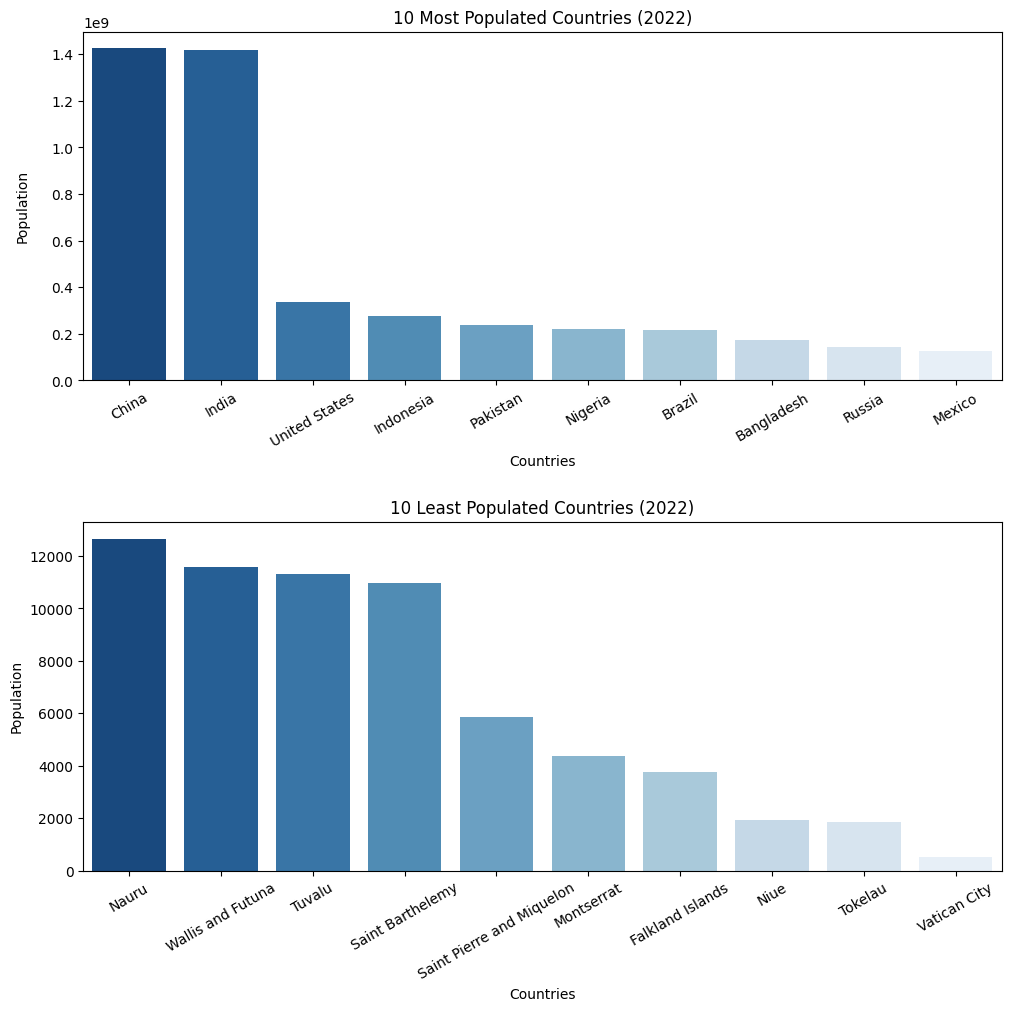

In [28]:
# Countries with highest and lowest population growth

# Sort countries by Population (year 2022)
population_sorted = df_pop.sort_values("2022", ascending=False)
population_sorted

# Blot bar charts
fig, ax = plt.subplots(2,1, figsize=(10,10),constrained_layout = True)

# Highest population countriest
sns.barplot(x="Country/Territory", y="2022", data=population_sorted.head(10),
            palette="Blues_r", ax=ax[0])
ax[0].set_title("10 Most Populated Countries (2022)")
ax[0].set_xlabel("Countries")
ax[0].set_ylabel("Population\n")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30)
plt.bar_label(ax[0].containers[0])

# Lowest population countries
sns.barplot(x="Country/Territory", y="2022", data=population_sorted.tail(10),
            palette="Blues_r", ax=ax[1])
ax[1].set_title("\n10 Least Populated Countries (2022)")
ax[1].set_xlabel("Countries")
ax[1].set_ylabel("Population")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30)
plt.show()

In [30]:
# Visualize choropleth map of countries' population number
fig = px.choropleth(df_pop, locations="Country/Territory",
                    locationmode="country names", scope="world",
                    color="2022", color_continuous_scale="Blues",
                    width=900, labels={"2022":"Population"})
fig.update_layout(title=dict(text="Number of Population in the World (2022)",x=0.5, y=0.9))
fig.show()

Population Distribution by Continent

In [31]:
# Population distribution by continent
print("Population Distribution by Continent (2022):")
pop_cont = df_pop.groupby("Continent")["2022"].sum()
pop_cont.sort_values(ascending=False, inplace=True)
print(pop_cont)

# Sunburst Chart
sb = px.sunburst(df_pop, path=["Continent", "Country/Territory"],
                  values="2022", color="2022",
                  labels={"2022":"Population"},
                  color_continuous_scale="Blues",
                  width=600)
sb.update_layout(title=dict(text="Population Distribution by Continent (2022)",x=0.5, y=0.95))

# Treemap Chart
tm = px.treemap(df_pop, path=[px.Constant("World"), "Continent", "Country/Territory"],
                values="2022", color="2022",
                labels={"2022":"Population"},
                color_continuous_scale="Blues",
                width=600)
sb.show()
tm.show()

Population Distribution by Continent (2022):
Continent
Asia             4721383274
Africa           1426730932
Europe            743147538
North America     600296136
South America     436816608
Oceania            45038554
Name: 2022, dtype: int64


<ipython-input-33-3b1b27c17e27>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-33-3b1b27c17e27>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-33-3b1b27c17e27>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-33-3b1b27c17e27>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-33-3b1b27c17e27>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

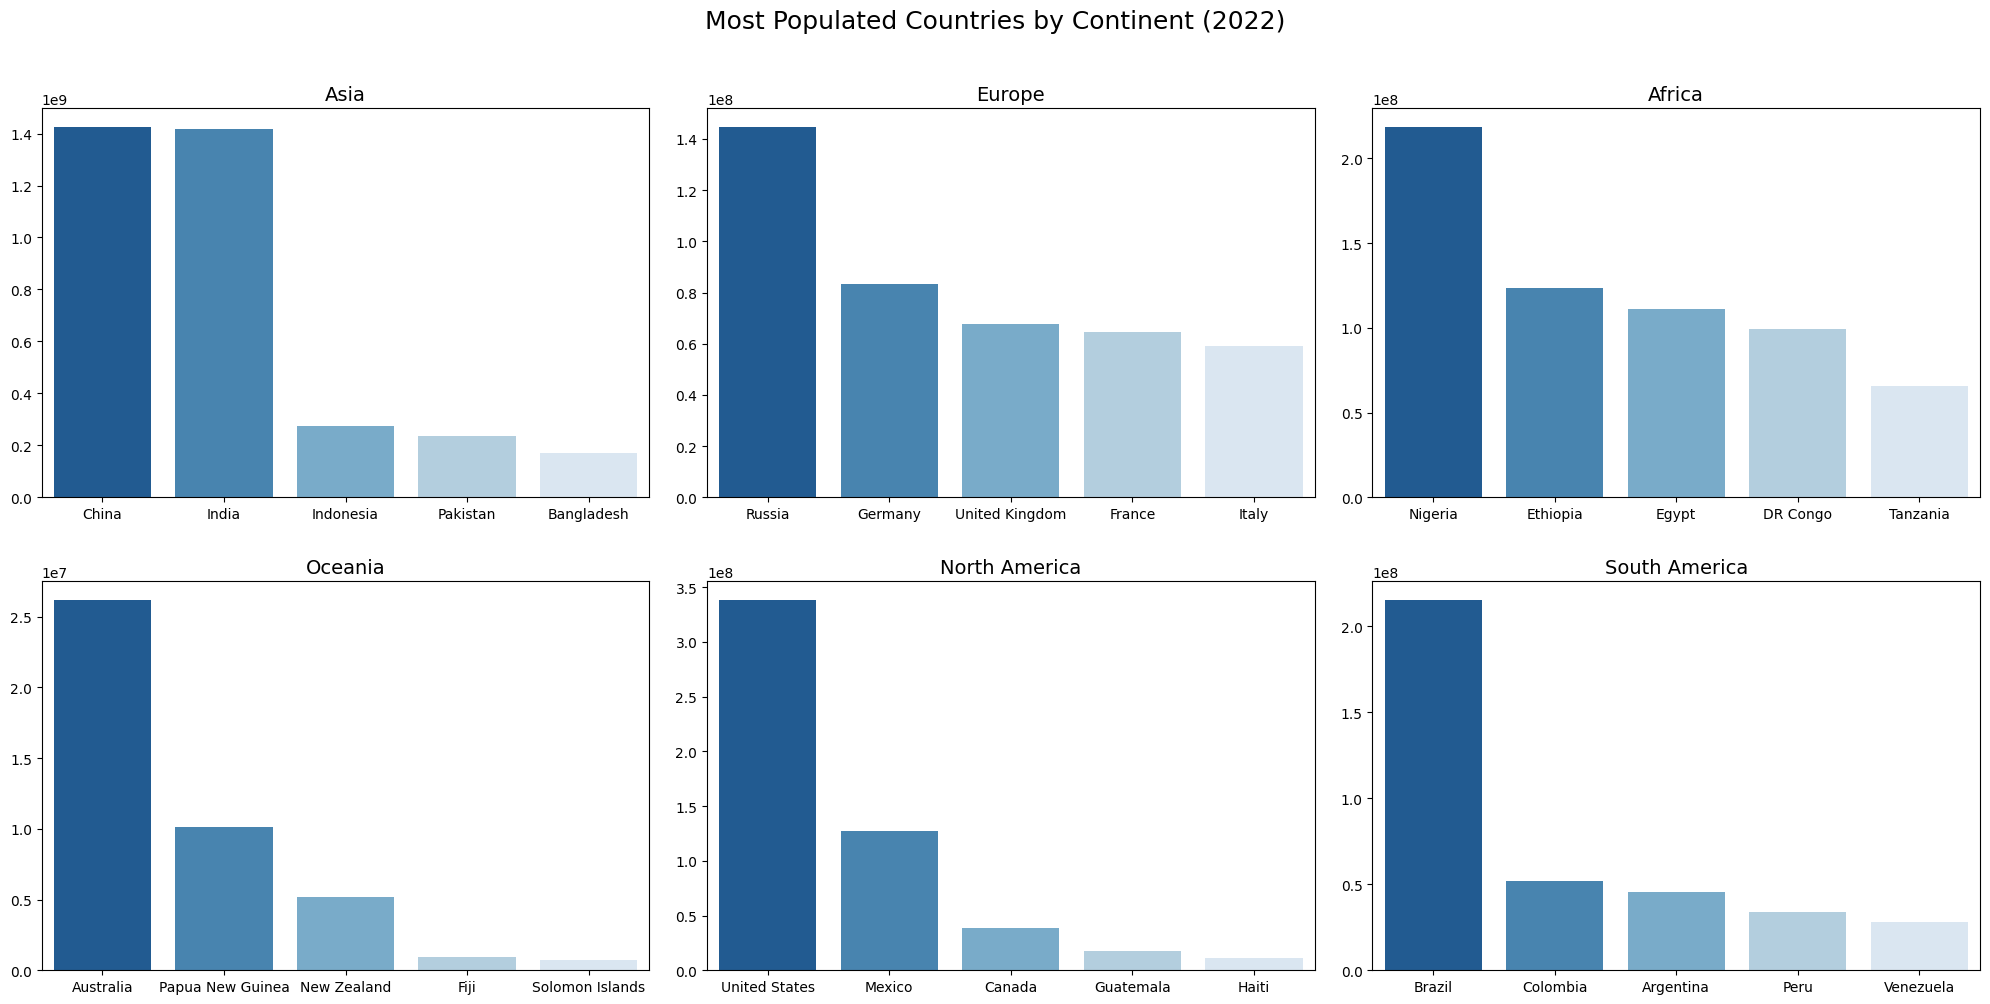

In [33]:
# Plotting Most Populated Countries by Continent
plt.figure(figsize=(20,10))
plt.suptitle("Most Populated Countries by Continent (2022)", fontsize=18, y=1)
continents=df_pop.Continent.unique()
for i, continent in enumerate(continents):
    ax = plt.subplot(2, 3, i+1)
    # Group Country by Continent
    pop_by_cont = df_pop[df_pop["Continent"] == continent][["Country/Territory", "2022"]]
    # Sort by Population and Get Top 5
    pop_by_cont = pop_by_cont.sort_values("2022", ascending=False)[:5]
    sns.barplot(x=pop_by_cont["Country/Territory"], y=pop_by_cont["2022"], ax=ax, palette="Blues_r")
    # Add Titles and Remove Labels
    ax.set_title(f"\n{continent}", fontsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.tight_layout()
plt.show()

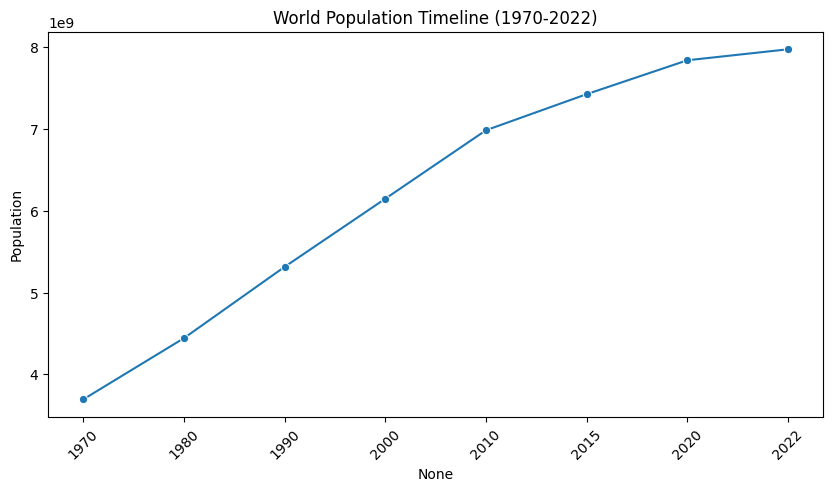

In [34]:
# Plotting Number of World Population Timeline
plt.subplots(figsize=(10,5))
growth = df_pop.iloc[:,5:13].sum()[::-1]
sns.lineplot(x=growth.index, y=growth.values, marker="o")
plt.xticks(rotation=45)
plt.ylabel("Population")
plt.title("World Population Timeline (1970-2022)")
plt.show()

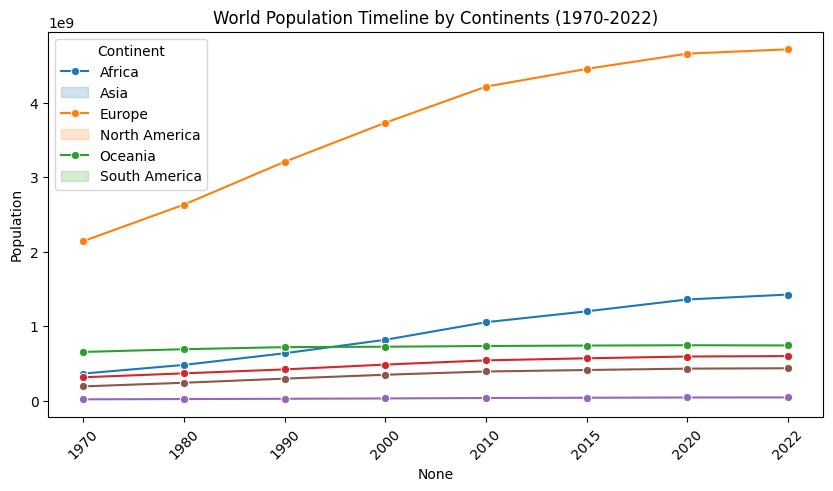

In [36]:
# Number of population timeline by continent

# Get total population of each continent
continent_pop = df_pop.copy()
continent_pop = continent_pop.groupby("Continent").sum().iloc[:,4:12] # get 1970-2022 column only
continent_pop = continent_pop.iloc[:,::-1] # reverse column

# Create line plots
plt.subplots(figsize=(10,5))
for continent in continent_pop.index:
    sns.lineplot(x=continent_pop.T.index, y=continent_pop.T[continent], marker="o")
plt.xticks(rotation=45)
plt.ylabel("Population")
plt.title("World Population Timeline by Continents (1970-2022)")
plt.legend(continent_pop.index, title="Continent")
plt.show()

World Population's Growth

In [37]:
# Growth rate statistics
print("Number of countries with positive growth rate:", len(np.where(df_pop["Growth Rate"] > 0)[0]))
print("Number of countries with negative growth rate:", len(np.where(df_pop["Growth Rate"] < 0)[0]))
print("Number of countries with stagnant growth rate:", len(np.where(df_pop["Growth Rate"] == 0)[0]))
print(f"Growth Rate Statistics:\n{df_pop['Growth Rate'].describe()}")

Number of countries with positive growth rate: 101
Number of countries with negative growth rate: 133
Number of countries with stagnant growth rate: 0
Growth Rate Statistics:
count    2.340000e+02
mean    -5.236597e+08
std      1.338498e+10
min     -9.810101e+10
25%     -8.326010e+09
50%     -2.201010e+09
75%      6.848990e+09
max      5.899899e+10
Name: Growth Rate, dtype: float64


<ipython-input-39-2513fc948107>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-39-2513fc948107>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-39-2513fc948107>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-39-2513fc948107>:23: UserWarning:

FixedFormatter should only be used together with FixedLocator



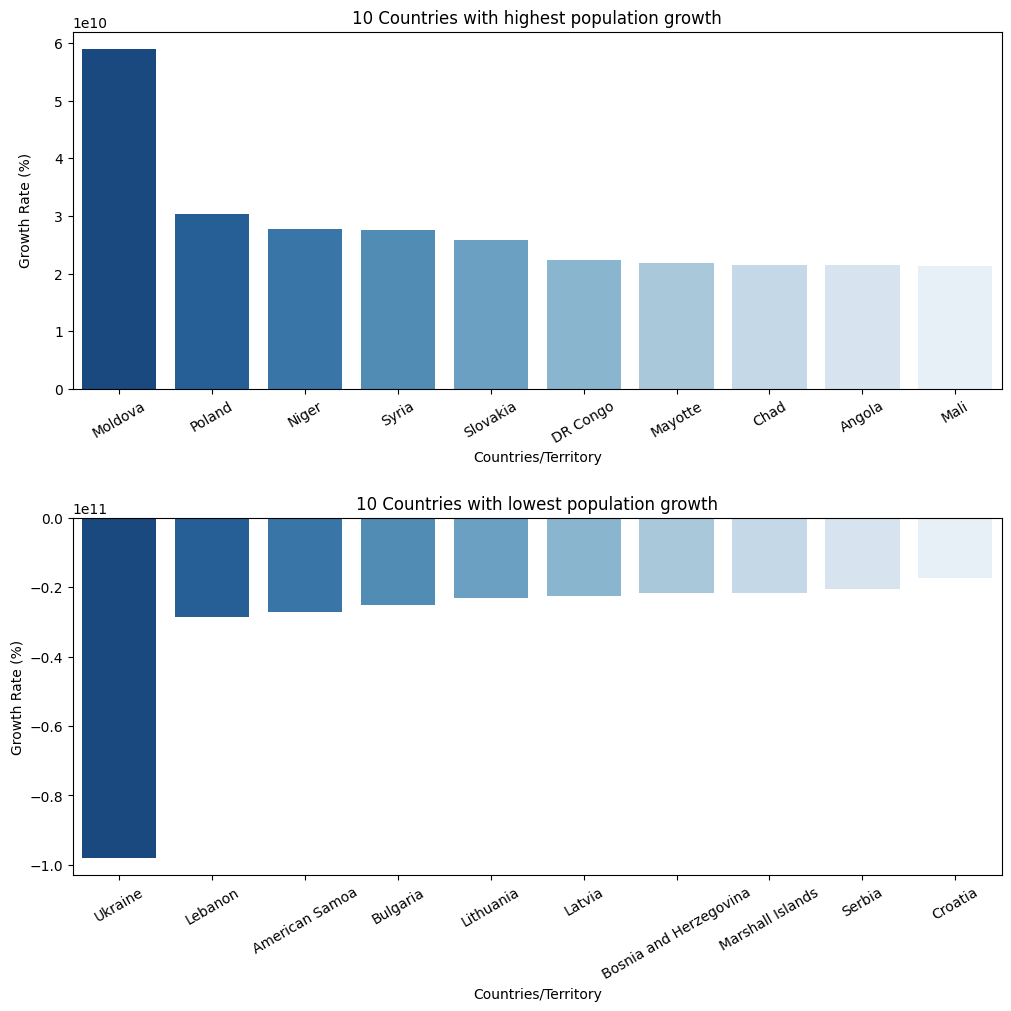

In [39]:
# Countries with highest and lowest population growth

# Sort countries by growth rate
growth_sorted = df_pop.sort_values("Growth Rate", ascending=False)

# Plot bar chart
fig, ax = plt.subplots(2,1, figsize=(10,10),constrained_layout = True)

# Highest population countries
sns.barplot(x="Country/Territory", y="Growth Rate", data=growth_sorted.head(10),
            palette="Blues_r", ax=ax[0])
ax[0].set_title("10 Countries with highest population growth")
ax[0].set_xlabel("Countries/Territory")
ax[0].set_ylabel("Growth Rate (%)\n")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30)

# Lowest population countries
sns.barplot(x="Country/Territory", y="Growth Rate", data=growth_sorted.tail(10)[::-1],
            palette="Blues_r", ax=ax[1])
ax[1].set_title("\n10 Countries with lowest population growth")
ax[1].set_xlabel("Countries/Territory")
ax[1].set_ylabel("Growth Rate (%)")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30)
plt.show()

In [40]:
# Visualize choropleth map of countries' population growth rates
fig = px.choropleth(df_pop, locations="Country/Territory",
                    locationmode="country names", scope="world",
                    color="Growth Rate", color_continuous_scale="Blues",
                    width=900, labels={"Growth Rate":"Rate (%)"})
fig.update_layout(title=dict(text="Each Country's Population Growth Rate This Year",x=0.5, y=0.9))
fig.show()

Summary

- The currently recorded world population is 7.973 million. China has the largest population, namely 1,425 million people, followed by India with a population of 1.41 million people. The country with the lowest population is Vatican City with 510 people.
- The world's population is increasing from year to year (Data 1970-2022). Asia's population has the highest population by continent (4,7m), followed by Africa (1.4m)
- The average rate of population growth in the world in 2022 is 0,957%. Moldova has highest population growth of 6,91%, while Ukraine has experienced a decline in population by 8.80%, this might be due to the ongoing war with Russia.